## Let's import the important Libraries

In [1]:
# Importing necessary libraries

import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical computations and handling arrays
import seaborn as sns  # Seaborn for advanced data visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting and visualization
from datetime import datetime  # Datetime module to handle date and time data

## Load Dataset

In [2]:
# Reading the Excel file into a Pandas DataFrame
df = pd.read_excel("C:/Users/DELL/Downloads/DataAnalyst_Assesment_Dataset.xlsx")

## Display Basic Info

In [3]:
# Displaying information about the DataFrame, including column names, non-null counts, and data types
print(df.info())

# Displaying the first five rows of the DataFrame to get a quick overview of the data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

## Check for missing values

In [4]:
# Checking for missing values in each column of the DataFrame  
# The isnull() function identifies missing values, and sum() counts them for each column  
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Booking ID              0
Customer ID             0
Customer Name           0
Booking Type            0
Booking Date            0
Status                  0
Class Type            672
Instructor            730
Time Slot             205
Duration (mins)       205
Price                   0
Facility              328
Theme                 727
Subscription Type    1000
Service Name            0
Service Type            0
Customer Email         94
Customer Phone        105
dtype: int64


## Handle Missing Data
Filling missing numerical values with median

In [5]:
# Filling missing values in specific columns with the median value of that column  
# This helps maintain data integrity while avoiding extreme values affecting the dataset  

df.fillna({
    "Price": df["Price"].median(),  # Replacing missing values in the "Price" column with its median
    "Duration (mins)": df["Duration (mins)"].median()  # Replacing missing values in "Duration (mins)" with its median
}, inplace=True)  # Modifies the DataFrame in place without creating a new copy

Fill categorical missing values with mode

In [6]:
# Filling missing values in categorical columns using mode (most frequent value)  
# and assigning "Unknown" where appropriate  

df.fillna({
    "Status": df["Status"].mode()[0],  # Replacing missing values in "Status" with the most frequent value (mode)
    "Facility": df["Facility"].mode()[0],  # Replacing missing values in "Facility" with its most frequent value
    "Instructor": "Unknown"  # Assigning "Unknown" to missing values in the "Instructor" column
}, inplace=True)  # Modifies the DataFrame directly

Standardize date format

In [7]:
# Converting the "Booking Date" column to a datetime format  
# The 'errors="coerce"' parameter ensures that invalid dates are converted to NaT (Not a Time) instead of causing errors  

df["Booking Date"] = pd.to_datetime(df["Booking Date"], errors='coerce')

Normalize Text Columns (strip spaces, lowercase where applicable)

In [8]:
# Cleaning and standardizing categorical and text-based columns  

# Stripping leading and trailing spaces, and converting the first letter of each word to uppercase in "Booking Type"
df["Booking Type"] = df["Booking Type"].str.strip().str.title()  

# Stripping spaces and converting all text to uppercase in "Status"
df["Status"] = df["Status"].str.strip().str.upper()  

# Converting all email addresses to lowercase for consistency  
df["Customer Email"] = df["Customer Email"].str.lower()  

# Converting phone numbers to string, removing any non-numeric characters (e.g., spaces, dashes, parentheses)  
df["Customer Phone"] = df["Customer Phone"].astype(str).str.replace("[^0-9]", "", regex=True)

## Remove duplicates

In [9]:
df.drop_duplicates(inplace=True)

## Feature Engineering

In [9]:
import pandas as pd
from datetime import time  # Importing time module to handle time-based operations

# Convert "Booking Date" column to datetime format  
# 'errors="coerce"' ensures invalid dates are converted to NaT instead of causing errors
df["Booking Date"] = pd.to_datetime(df["Booking Date"], errors='coerce')

# Convert "Time Slot" column to datetime format and extract only the time component  
# 'errors="coerce"' ensures invalid time values are converted to NaT instead of causing errors  
df["Time Slot"] = pd.to_datetime(df["Time Slot"], format="%H:%M", errors='coerce').dt.time

# Extract the month from the "Booking Date" column to create a "Booking Month" column  
df["Booking Month"] = df["Booking Date"].dt.month

# Function to categorize peak hours based on time slots  
def categorize_peak_hours(t):
    if pd.isna(t):  # Handling missing or invalid time values
        return "Unknown"
    if time(18, 0) <= t <= time(21, 0):  # Categorizing time slots between 18:00 - 21:00 as "Peak"
        return "Peak"
    return "Off-Peak"  # All other time slots are considered "Off-Peak"

# Applying the peak hour categorization function to the "Time Slot" column  
df["Peak Hours"] = df["Time Slot"].apply(categorize_peak_hours)

# Convert "Price" column to a numeric format to calculate revenue per booking  
# 'errors="coerce"' ensures invalid values are converted to NaN instead of causing errors  
df["Revenue per Booking"] = pd.to_numeric(df["Price"], errors='coerce')

# Display the first few rows of the modified DataFrame to verify changes  
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),...,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone,Booking Month,Peak Hours,Revenue per Booking
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,PENDING,NaN,Unknown,NaT,90.0,...,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,0017309034,5,Unknown,42.74
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,PENDING,NaN,Unknown,NaT,90.0,...,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,0015375668,5,Unknown,182.06
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,CONFIRMED,NaN,Unknown,NaT,120.0,...,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,0018807769,5,Unknown,207.50
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,PENDING,NaN,Unknown,NaT,90.0,...,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,0014913107,6,Unknown,203.20
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,PENDING,Art,Unknown,NaT,120.0,...,Play Area,NaN,NaN,Art,Class,customer5@example.com,0017183794,4,Unknown,161.14


## Exploratory Data Analysis

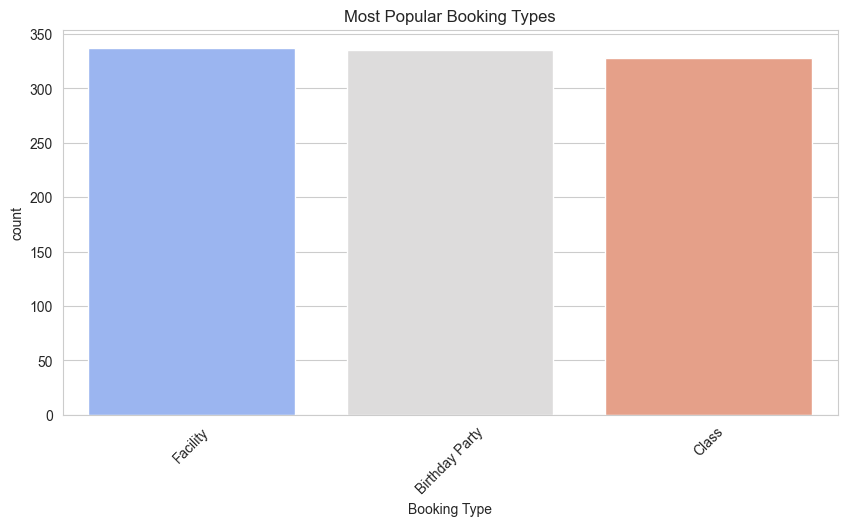

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style to "whitegrid" for better readability  
sns.set_style("whitegrid")

# Create a figure with a specific size (width=10, height=5 inches)  
plt.figure(figsize=(10, 5))

# Create a count plot to visualize the frequency of each booking type  
# 'order' ensures that booking types are sorted by their frequency in descending order  
# 'palette="coolwarm"' applies a visually appealing color scheme  
sns.countplot(data=df, x="Booking Type", order=df["Booking Type"].value_counts().index, palette="coolwarm")

# Set the title of the plot  
plt.title("Most Popular Booking Types")

# Rotate x-axis labels by 45 degrees for better readability  
plt.xticks(rotation=45)

# Display the plot  
plt.show()

## Time-series Analysis

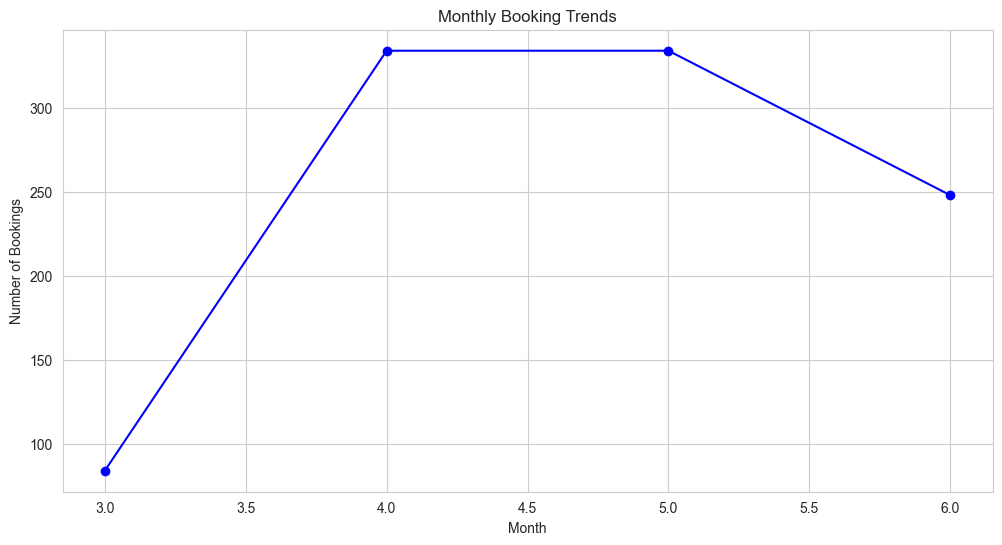

In [11]:
import matplotlib.pyplot as plt  

# Create a figure with a specific size (width=12, height=6 inches)  
plt.figure(figsize=(12, 6))  

# Group the data by "Booking Month" and count the number of bookings  
# "Booking ID" is used as a unique identifier for counting the number of bookings  
df.groupby("Booking Month")["Booking ID"].count().plot(
    kind='line', marker='o', color='b'  # Line plot with circular markers and blue color  
)

# Set the title of the plot  
plt.title("Monthly Booking Trends")

# Label the x-axis as "Month"  
plt.xlabel("Month")

# Label the y-axis as "Number of Bookings"  
plt.ylabel("Number of Bookings")

# Display the plot  
plt.show()

## Revenue Distribution by Service

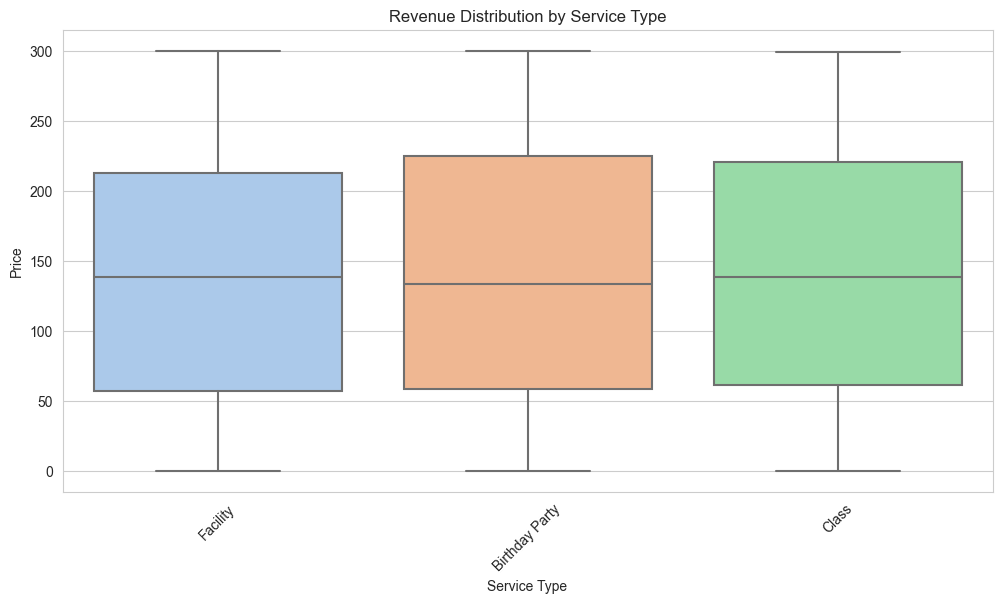

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specific size (width=12, height=6 inches)  
plt.figure(figsize=(12, 6))

# Create a box plot to visualize the distribution of "Price" for each "Service Type"  
# Box plots help identify the spread, median, and potential outliers in the dataset  
# 'palette="pastel"' applies a soft color scheme for better visibility  
sns.boxplot(data=df, x="Service Type", y="Price", palette="pastel")

# Rotate x-axis labels by 45 degrees for better readability  
plt.xticks(rotation=45)

# Set the title of the plot  
plt.title("Revenue Distribution by Service Type")

# Display the plot  
plt.show()

## Saving Cleaned Booking Data

In [13]:
# Save the cleaned DataFrame to a CSV file  
# 'index=False' ensures that the index is not saved in the output file  
df.to_csv("cleaned_booking_data.csv", index=False)

# Print a confirmation message indicating that data cleaning and EDA are complete  
print("Data Cleaning and EDA Completd!")


Data Cleaning and EDA Completd!


## 1. Business Insights Extraction

In [14]:
 # Grouping total revenue by "Booking Type" and sorting in descending order  
# This helps identify which booking type generates the most revenue  
booking_revenue = df.groupby("Booking Type")["Revenue per Booking"].sum().sort_values(ascending=False)

# Display the revenue generated by each booking type  
print(booking_revenue)

# Counting the number of bookings per facility  
# This helps analyze which facilities are used most frequently  
facility_usage = df["Facility"].value_counts()

# Display the facility usage count  
print(facility_usage)

Booking Type
Facility          48769.17
Class             45566.38
Birthday Party    45141.66
Name: Revenue per Booking, dtype: float64
Facility
Play Area     684
Party Room    316
Name: count, dtype: int64


## 2. Customer Segmentation

In [15]:
from sklearn.cluster import KMeans  

# Aggregate customer data  
# Summing total revenue spent by each customer  
# Counting total bookings made by each customer  
customer_data = df.groupby("Customer ID").agg({
    "Revenue per Booking": "sum",  # Total spend per customer  
    "Booking ID": "count"  # Total number of bookings per customer  
}).rename(columns={"Revenue per Booking": "Total Spend", "Booking ID": "Total Bookings"})

# Applying K-Means clustering to segment customers into 3 groups based on spending & booking frequency  
kmeans = KMeans(n_clusters=3, random_state=42)  # Setting number of clusters to 3 with a fixed random state for reproducibility  
customer_data["Cluster"] = kmeans.fit_predict(customer_data)  # Assigning each customer to a cluster  

# Displaying the first few rows of the clustered customer data  
print(customer_data.head())

                                      Total Spend  Total Bookings  Cluster
Customer ID                                                               
005c857c-bced-40b0-b29b-b394a06d17dc       185.46               1        0
007c4181-3664-46a9-828b-09f2dd214716        83.96               1        0
008658b8-c29e-480d-b281-1ef6c653e786       120.73               1        0
00901ce3-3d86-4c97-bca2-40ccac2fb99f        42.74               1        1
009ce218-e747-4541-a1d9-788aa6dc2dce       213.13               1        2


## 3. Predict Future Bookings (Time Series Forecasting)

In [16]:
from statsmodels.tsa.arima.model import ARIMA  

# Convert "Booking Date" to datetime format to ensure proper time series processing  
df["Booking Date"] = pd.to_datetime(df["Booking Date"])

# Aggregate total bookings per month  
# 'resample("M")' groups data by month, using "Booking Date" as the time index  
monthly_bookings = df.resample("M", on="Booking Date")["Booking ID"].count()

# Fit an ARIMA model to forecast future bookings  
# order=(2,1,2) specifies the model parameters (p=2, d=1, q=2)  
model = ARIMA(monthly_bookings, order=(2,1,2))  # ARIMA(p,d,q): Autoregressive(2), Differencing(1), Moving Average(2)  
model_fit = model.fit()  # Train the model  

# Forecast the number of bookings for the next 6 months  
forecast = model_fit.forecast(steps=6)  # Predict 6 future time periods  
print(forecast)  # Print the forecasted values

2025-07-31    246.244654
2025-08-31    221.935661
2025-09-30    220.665965
2025-10-31    221.081004
2025-11-30    221.128515
2025-12-31    221.122815
Freq: M, Name: predicted_mean, dtype: float64


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


## 4. Create Interactive Dashboards (Python Dash)

In [17]:
pip install dash

In [17]:
import dash  
from dash import dcc, html  
from dash.dependencies import Input, Output  
import plotly.express as px  
import pandas as pd  

# Aggregate monthly revenue from booking data  
monthly_revenue = df.resample("M", on="Booking Date")["Revenue per Booking"].sum().reset_index()

# Initialize Dash app  
app = dash.Dash(__name__)  

# Define the layout of the dashboard  
app.layout = html.Div([
    html.H1("Booking Revenue Dashboard", style={'textAlign': 'center'}),  # Dashboard title  

    # Dropdown menu to select a service type  
    html.Label("Select Service Type:"),  
    dcc.Dropdown(
        id="service-dropdown",  
        options=[{"label": service, "value": service} for service in df["Service Type"].unique()],  # Dropdown options from unique service types  
        value=df["Service Type"].unique()[0],  # Default value as the first service type  
        clearable=False  # Ensures a selection is always made  
    ),  

    # Placeholder for time-series revenue graph  
    dcc.Graph(id="time-series-graph"),  

    # Placeholder for revenue distribution histogram  
    dcc.Graph(id="revenue-distribution"),  

    # Static bar chart showing revenue by booking type  
    dcc.Graph(id="booking-type-revenue", figure=px.bar(df, x="Booking Type", y="Revenue per Booking", title="Revenue by Booking Type"))
])  

# Callback to update the time-series graph based on selected service type  
@app.callback(
    Output("time-series-graph", "figure"),  
    Input("service-dropdown", "value")  
)  
def update_time_series(selected_service):  
    # Filter data for the selected service and aggregate revenue per month  
    filtered_df = df[df["Service Type"] == selected_service].resample("M", on="Booking Date")["Revenue per Booking"].sum().reset_index()  
    # Generate a line chart for revenue trend  
    fig = px.line(filtered_df, x="Booking Date", y="Revenue per Booking", title=f"Monthly Revenue for {selected_service}")  
    return fig  

# Callback to update the revenue distribution histogram based on selected service type  
@app.callback(
    Output("revenue-distribution", "figure"),  
    Input("service-dropdown", "value")  
)  
def update_revenue_distribution(selected_service):  
    # Filter data for the selected service  
    filtered_df = df[df["Service Type"] == selected_service]  
    # Generate a histogram showing revenue distribution  
    fig = px.histogram(filtered_df, x="Revenue per Booking", title=f"Revenue Distribution for {selected_service}", nbins=20)  
    return fig  

# Run the Dash app  
if __name__ == "__main__":  
    app.run(debug=True)

## 5. Automate Reporting

In [19]:
pip install pydantic==1.10.13 pandas-profiling

In [20]:
pip install ydata-profiling pydantic==1.10.13

  Using cached visions-0.7.5-py3-none-any.whl.metadata (6.3 kB)
Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [18]:
from ydata_profiling import ProfileReport  

# Generate an automated EDA report for the dataset  
profile = ProfileReport(df, title="Booking Data Report", explorative=True)  

# Save the report as an HTML file for easy viewing  
profile.to_file("booking_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
import webbrowser
webbrowser.open("booking_report.html")

True